In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

# Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

- 딕셔너리
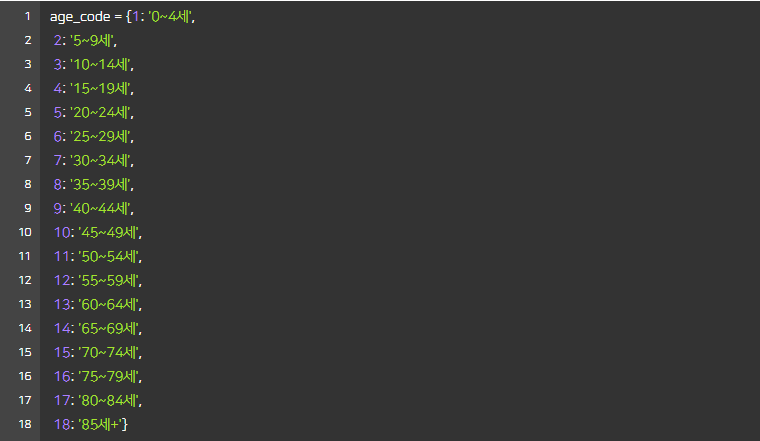

- 출력 예시
    - 다음 이미지와 같은 결과가 나오며, 소숫점 표현 방식이 다르더라도 출력값이 같으면 상관 없습니다. 예를 들어 예시결과는 32인데 직접 구한 값이 32.0 로 보이더라도 상관이 없습니다.
    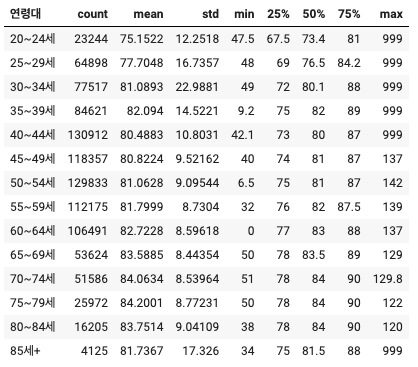

In [2]:
age_code = {1: '0~4세',
            2: '5~9세',
            3: '10~14세',
            4: '15~19세',
            5: '20~24세',
            6: '25~29세',
            7: '30~34세',
            8: '35~39세',
            9: '40~44세',
            10: '45~49세',
            11: '50~54세',
            12: '55~59세',
            13: '60~64세',
            14: '65~69세',
            15: '70~74세',
            16: '75~79세',
            17: '80~84세',
            18: '85세+'}

In [3]:
# 연령대 코드를 연령대로 변환
df_q1 = df.copy()
df_q1['연령대'] = df_q1['연령대코드(5세단위)'].map(age_code)

# 연령대별 허리둘레에 대한 기술통계 구하기
df_q1.groupby('연령대')['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

- 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

- 출력 예시

    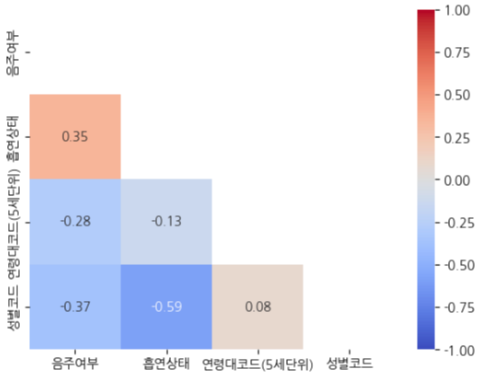

<Axes: >

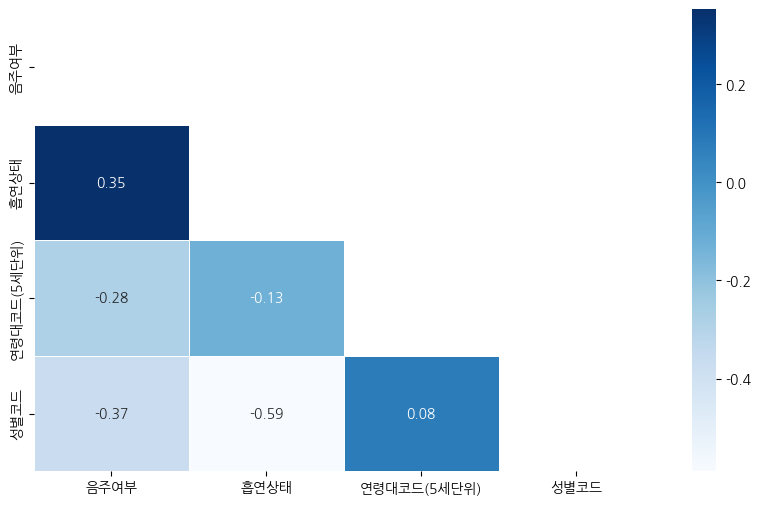

In [4]:
# 필요한 열만 선택
selected_columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
data = df[selected_columns]

# 상관계수 구하기
correlation_matrix = data.corr()

# 상관계수 시각화
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, mask=mask)

# Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

- 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!
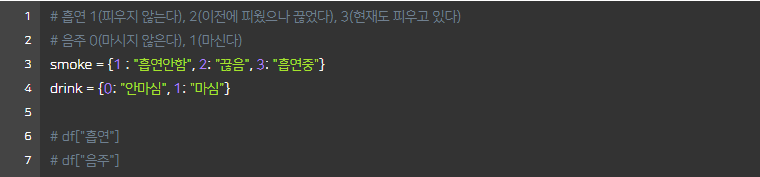

- groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
- crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
- 그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.
- 출력 예시

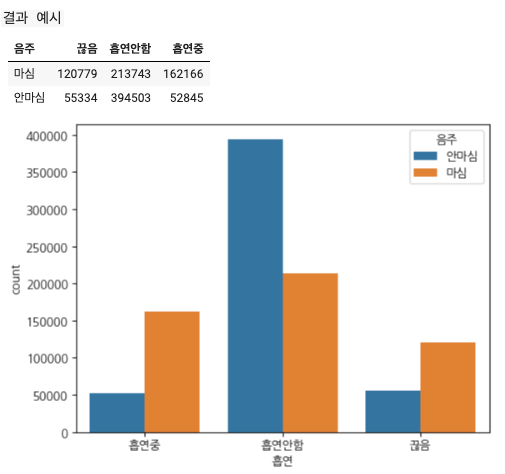

In [5]:
df_q3 = df.copy()

# 딕셔너리 정의
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# "흡연"과 "음주" 열의 숫자 값을 딕셔너리 값을 기반으로 문자로 변환
df_q3["흡연"] = df_q3["흡연상태"].map(smoke)
df_q3["음주"] = df_q3["음주여부"].map(drink)

흡연       끊음    흡연안함     흡연중
음주                         
마심   120779  213743  162166
안마심   55334  394503   52845


<Axes: xlabel='흡연', ylabel='count'>

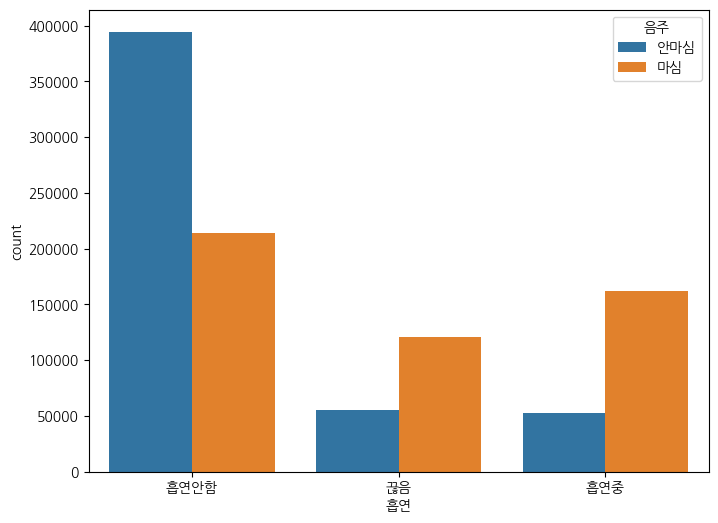

In [6]:
# pivot_table을 사용하여 교차 테이블 구하기
pivot_table = df_q3.pivot_table(index="음주", columns="흡연", aggfunc="size", fill_value=0)
print(pivot_table)
# 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=df_q3, x="흡연", hue="음주", hue_order=["안마심", "마심"], order=["흡연안함", "끊음", "흡연중"])

<Axes: xlabel='흡연', ylabel='count'>

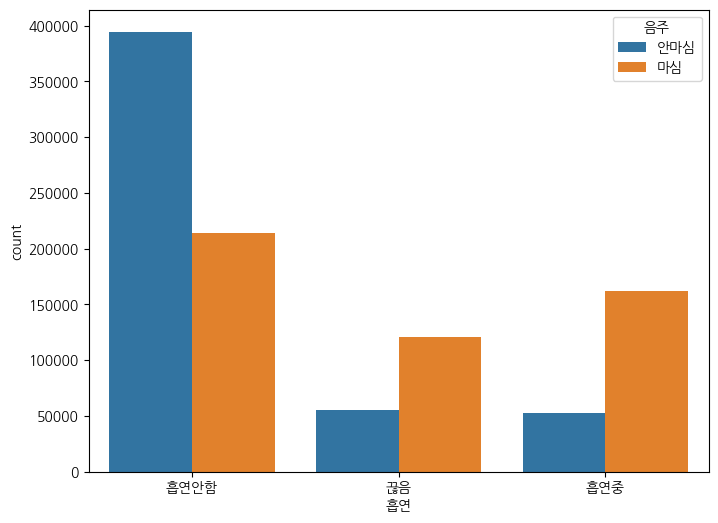

In [7]:
# crosstab을 사용하여 교차 테이블 구하기
cross_tab = pd.crosstab(df_q3["흡연"], df_q3["음주"])

# 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=df_q3, x="흡연", hue="음주", hue_order=["안마심", "마심"], order=["흡연안함", "끊음", "흡연중"])

# Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!
- 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

- 출력 예시

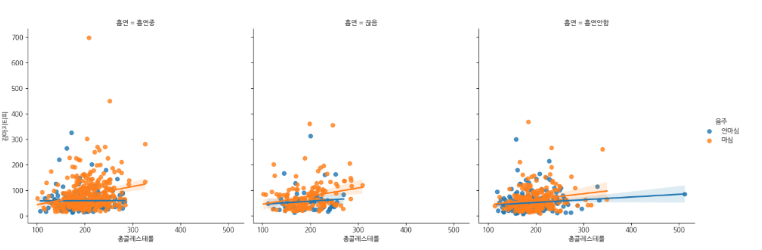

C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

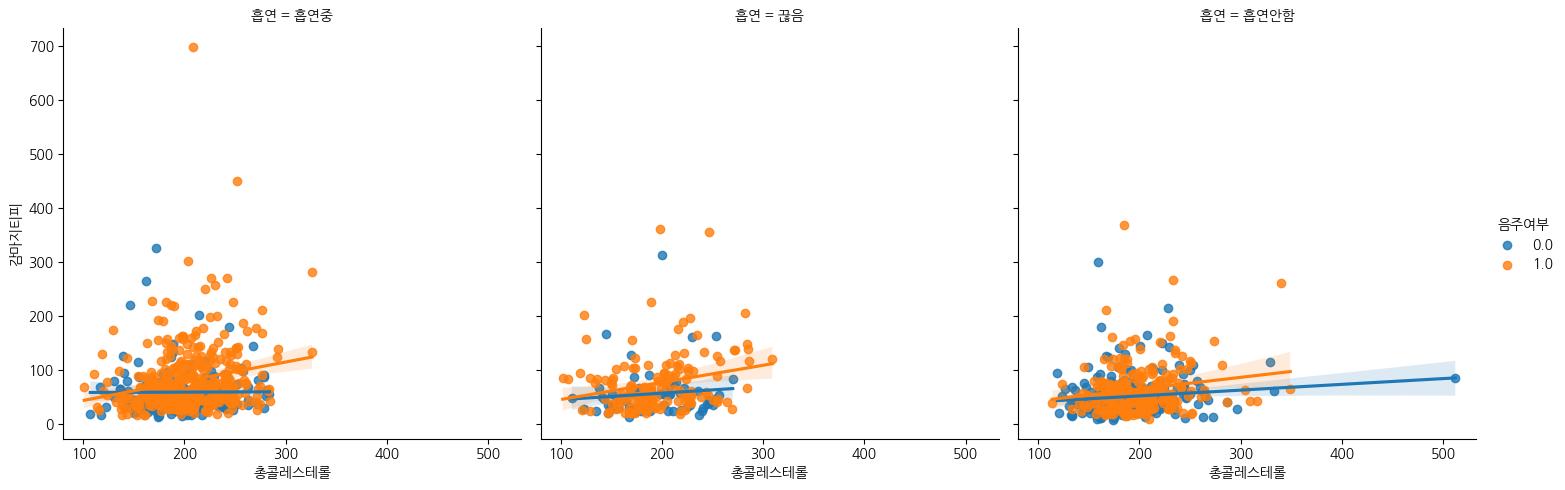

In [8]:
df_q4 = df[df['체중(5Kg 단위)'] >= 120].copy()

# "흡연"과 "음주" 열의 숫자 값을 딕셔너리 값을 기반으로 문자로 변환
df_q4["흡연"] = df_q4["흡연상태"].map(smoke)

# 산점도 시각화
plt.figure(figsize=(8, 6))
sns.lmplot(x='총콜레스테롤', y='감마지티피', hue='음주여부', col="흡연", data=df_q4)

# Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

- 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.
- 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!
- 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)
- 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.
- 출력 예시

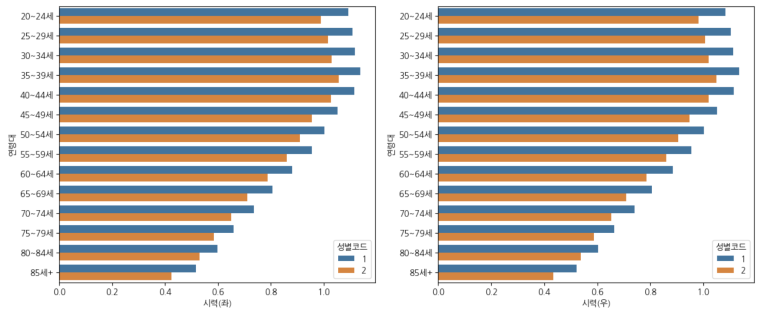

Text(0.5, 1.0, '우측 시력')

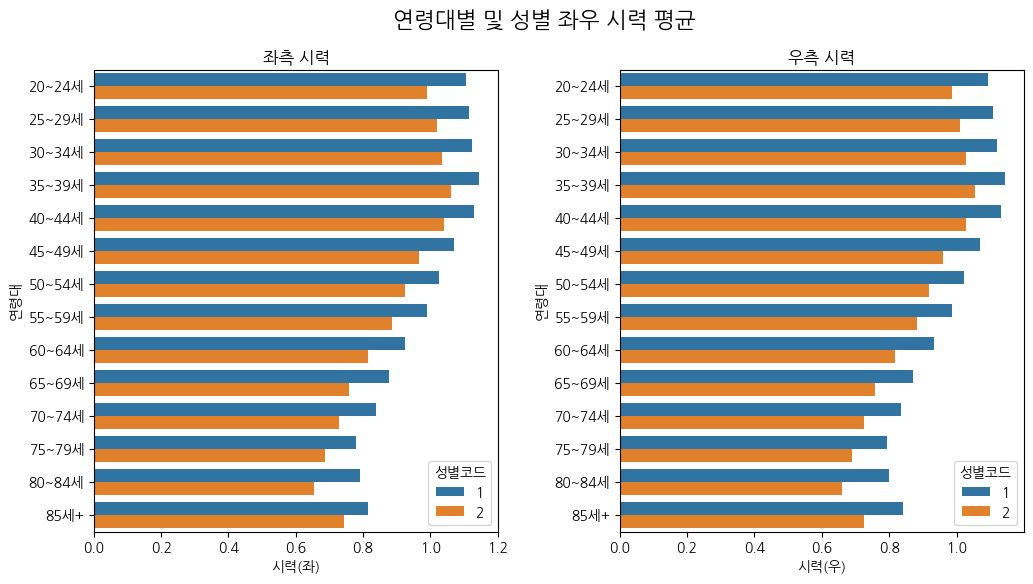

In [9]:
df_q5 = df.copy()
df_q5['연령대'] = df_q5['연령대코드(5세단위)'].map(age_code)

# 시력 데이터 전처리 (0.1 이하 및 실명 데이터 제외)
df_q5['시력(좌)'] = df_q5['시력(좌)'].apply(lambda x: 0.1 if x <= 0.1 else (9.9 if x == 9.9 else x))
df_q5['시력(우)'] = df_q5['시력(우)'].apply(lambda x: 0.1 if x <= 0.1 else (9.9 if x == 9.9 else x))

# 연령대, 성별에 따른 좌우 시력 평균 구하기
age_gender_avg_vision = df_q5.groupby(['연령대', '성별코드'])[['시력(좌)', '시력(우)']].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.3)
plt.suptitle("연령대별 및 성별 좌우 시력 평균", fontsize=16)

plt.subplot(1, 2, 1)
sns.barplot(y='연령대', x='시력(좌)', hue='성별코드', data=age_gender_avg_vision, orient='h')
plt.title("좌측 시력")

plt.subplot(1, 2, 2)
sns.barplot(y='연령대', x='시력(우)', hue='성별코드', data=age_gender_avg_vision, orient='h')
plt.title("우측 시력")